In [2]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [3]:
# Set the paths to your rock, paper, and scissor folders
rock_folder = 'rock/'
paper_folder = 'paper/'
scissor_folder = 'scissors/'

In [4]:
# Parameters for resizing images
image_width = 128  # Desired width
image_height = 128  # Desired height

In [5]:
# Function to extract HOG features from an image
def extract_hog_features(image):
    hog = cv2.HOGDescriptor()
    hog_features = hog.compute(image)
    hog_features = hog_features.reshape(-1)  # Flatten the feature vector
    return hog_features

In [6]:
# Load and process the images
X = []
y = []

In [7]:
# Load rock images
print('started:', rock_folder)
for filename in os.listdir(rock_folder):
    if filename.endswith('.png'):
        image = cv2.imread(os.path.join(rock_folder, filename))
        image = cv2.resize(image, (image_width, image_height))  # Resize the image
        hog_features = extract_hog_features(image)
        X.append(hog_features)
        y.append(0)  # Rock class label
print('ended:', rock_folder)

started: rock/
ended: rock/


In [8]:
# Load paper images
print('started:', paper_folder)
for filename in os.listdir(paper_folder):
    if filename.endswith('.png'):
        image = cv2.imread(os.path.join(paper_folder, filename))
        image = cv2.resize(image, (image_width, image_height))  # Resize the image
        hog_features = extract_hog_features(image)
        X.append(hog_features)
        y.append(1)  # Paper class label
print('ended:', paper_folder)

started: paper/
ended: paper/


In [9]:
# Load scissor images
print('started:', scissor_folder)
for filename in os.listdir(scissor_folder):
    if filename.endswith('.png'):
        image = cv2.imread(os.path.join(scissor_folder, filename))
        image = cv2.resize(image, (image_width, image_height))  # Resize the image
        hog_features = extract_hog_features(image)
        X.append(hog_features)
        y.append(2)  # Scissor class label
print('ended:', scissor_folder)

started: scissors/
ended: scissors/


In [11]:
# Convert the feature matrix and labels to numpy arrays
X = np.array(X)
y = np.array(y)

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [49]:
# Create the decision tree classifier
model = DecisionTreeClassifier()

# Train the model on the training set
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [51]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [44]:
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.958904109589041


In [53]:
import joblib

In [69]:
joblib.dump(model, 'rock_paper_scissor_decision_tree.joblib')

['rock_paper_scissor_decision_tree2.joblib']

In [21]:
from sklearn.ensemble import RandomForestClassifier  # For classification

In [53]:
model2 = RandomForestClassifier()

In [54]:
model2.fit(X_train, y_train)

RandomForestClassifier()

In [55]:
y_pred = model2.predict(X_test)

In [37]:
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9703196347031964


In [35]:
# save the model
joblib.dump(model2, 'rock_paper_scissor_random_forest.joblib')

['rock_paper_scissor_random_forest.joblib']

In [32]:
# Train KNeighborsClassifier model
from sklearn.neighbors import KNeighborsClassifier
import math

In [33]:
# this is the best solution to provide k value for the KNearestNeighbors algorithm (Should be odd number)
math.sqrt(len(y_train))

41.83300132670378

In [35]:
# this will use k value as 41 taken from previous method, p is 3 as we have 3 class, metric euclidean to calculate distance between the neighbors
KNearestNeighbors = KNeighborsClassifier(n_neighbors=41, p=3, metric='euclidean') 
KNearestNeighbors.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=41, p=3)

In [36]:
y_pred_of_knn = KNearestNeighbors.predict(X_test)

In [47]:
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred_of_knn)
print("Accuracy:", accuracy)

Accuracy: 0.9634703196347032


In [50]:
# save the model
joblib.dump(KNearestNeighbors, 'knn.joblib')

['knn.joblib']

In [20]:
# using gaussian naive bayes
from sklearn.naive_bayes import GaussianNB
gaussianNB_model = GaussianNB()
gaussianNB_model.fit(X_train, y_train)

GaussianNB()

In [21]:
y_pred_of_gnb = gaussianNB_model.predict(X_test)

In [22]:
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred_of_gnb)
print("Accuracy:", accuracy)

Accuracy: 0.9041095890410958


In [25]:
# save the model
joblib.dump(gaussianNB_model, 'gnb.joblib')

['gnb.joblib']

In [40]:
# train using svm model
from sklearn.svm import SVC
# ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
svc_model = SVC(kernel='poly')

In [41]:
svc_model.fit(X_train, y_train)

SVC(kernel='linear')

In [42]:
y_pred = svc_model.predict(X_test)

In [39]:
joblib.dump(svc_model, 'svc.joblib')

['svc.joblib']

In [11]:
# k-means clustering
from sklearn.cluster import KMeans

num_clusters = 3  # Number of clusters (rock, paper, scissor)

# Perform K-means clustering
kmeans_model = KMeans(n_clusters=num_clusters, random_state=0)
kmeans_model.fit(X)

# Assign labels to the cluster centers
cluster_labels = kmeans_model.labels_

/home/akash/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [12]:
# Map cluster labels to class labels
class_labels = np.zeros(num_clusters, dtype=int)
for cluster in range(num_clusters):
    mask = (cluster_labels == cluster)
    class_labels[cluster] = np.bincount(y[mask]).argmax()

In [13]:
# Predict the class labels for the training data
y_pred = [class_labels[label] for label in cluster_labels]

In [14]:
# Calculate the training accuracy
train_accuracy = accuracy_score(y, y_pred)
print('Training Accuracy:', train_accuracy)

Training Accuracy: 0.6279707495429616


In [17]:
joblib.dump(kmeans_model, 'kmeans.joblib')

['kmeans.joblib']

# Train a neural network

In [13]:
X_train[0].shape

(34020,)

In [15]:
from tensorflow import keras
import tensorflow as tf

model = keras.Sequential([
    keras.layers.Input(shape=(34020,)),  # Input layer with 34020 units
    keras.layers.Dense(500, activation='tanh'),   # hidden layer
    keras.layers.Dense(250, activation='tanh'),   # hidden layer
    keras.layers.Dense(3, activation='sigmoid') # Last layer with 3 neuron (output layer)
])

# Define the ModelCheckpoint callback
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='best_model.h5',   # Path to save the best model
    monitor='val_accuracy',      # Metric to monitor (validation accuracy in this case)
    save_best_only=True,         # Save only the best model
    save_weights_only=False,     # Save the entire model, including architecture and optimizer state
    mode='max',                  # Mode of the monitored metric ('max' for accuracy, 'min' for loss, etc.)
    verbose=1                    # Verbosity mode (1: print notification when a new best model is saved)
)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with EarlyStopping callback
history = model.fit(
    X_train, y_train,
    batch_size=32,
    epochs=5,
    validation_data=(X_test, y_test),  # Pass the validation data directly here
    callbacks=[checkpoint_callback]  # Add the ModelCheckpoint callback to the callbacks list
)

Epoch 1/5
55/55 [==============================] - ETA: 0s - loss: 1.4068 - accuracy: 0.4531
Epoch 1: val_accuracy improved from -inf to 0.62785, saving model to best_model.h5
55/55 [==============================] - 8s 141ms/step - loss: 1.4068 - accuracy: 0.4531 - val_loss: 0.8313 - val_accuracy: 0.6279
Epoch 2/5
55/55 [==============================] - ETA: 0s - loss: 0.7428 - accuracy: 0.6286
Epoch 2: val_accuracy did not improve from 0.62785
55/55 [==============================] - 7s 135ms/step - loss: 0.7428 - accuracy: 0.6286 - val_loss: 0.7926 - val_accuracy: 0.5479
Epoch 3/5
55/55 [==============================] - ETA: 0s - loss: 0.6383 - accuracy: 0.6537
Epoch 3: val_accuracy improved from 0.62785 to 0.63014, saving model to best_model.h5
55/55 [==============================] - 8s 145ms/step - loss: 0.6383 - accuracy: 0.6537 - val_loss: 0.5888 - val_accuracy: 0.6301
Epoch 4/5
55/55 [==============================] - ETA: 0s - loss: 0.4681 - accuracy: 0.8280
Epoch 4: val_ac

In [16]:
model.load_weights('best_model.h5')
model.evaluate(X_test, y_test)

14/14 [==============================] - 0s 9ms/step - loss: 0.2373 - accuracy: 0.9315


[0.23727694153785706, 0.931506872177124]

In [50]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

14/14 [==============================] - 0s 8ms/step


In [51]:
# confusion matrix
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[135,   0,   3],
       [  3, 134,   8],
       [  1,   1, 153]], dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

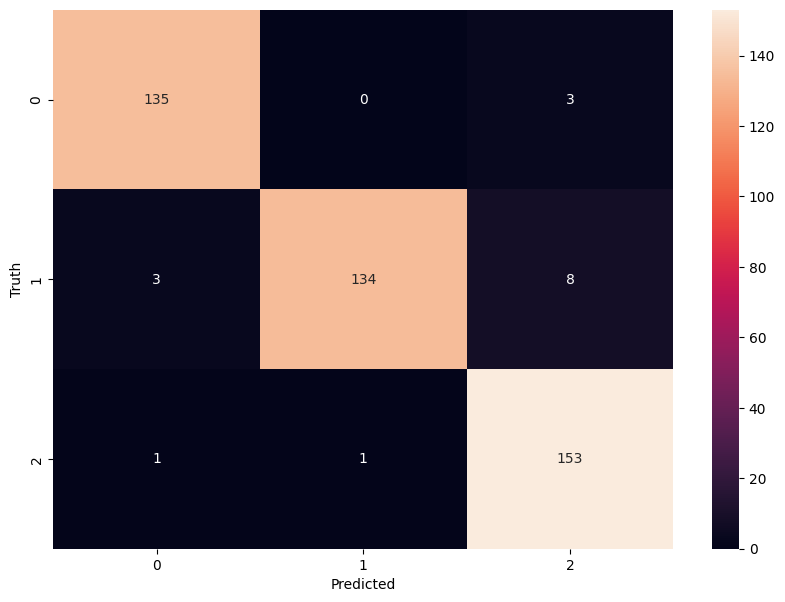

In [52]:
import seaborn as sn
import matplotlib.pyplot as plt

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [54]:
joblib.dump(model, 'neural_network.joblib')

['neural_network.joblib']